In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [109]:
data = pd.read_csv("train.csv")
data.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [110]:
data.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [111]:
print('Shape of the Dataset:    ', data.shape)
print('\n')
data.info()

Shape of the Dataset:     (9800, 18)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales        

In [113]:
data[data['Postal Code'].isnull()]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [114]:
data['Postal Code'] = data['Postal Code'].fillna(5401)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [116]:
Category = data['Category'].value_counts()
SubCategory = data['Sub-Category'].value_counts()
print(Category)

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64


In [117]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55217.343265,230.769059
std,2829.160653,32066.750532,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [118]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 30]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (4 * nGraphPerRow, 5 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

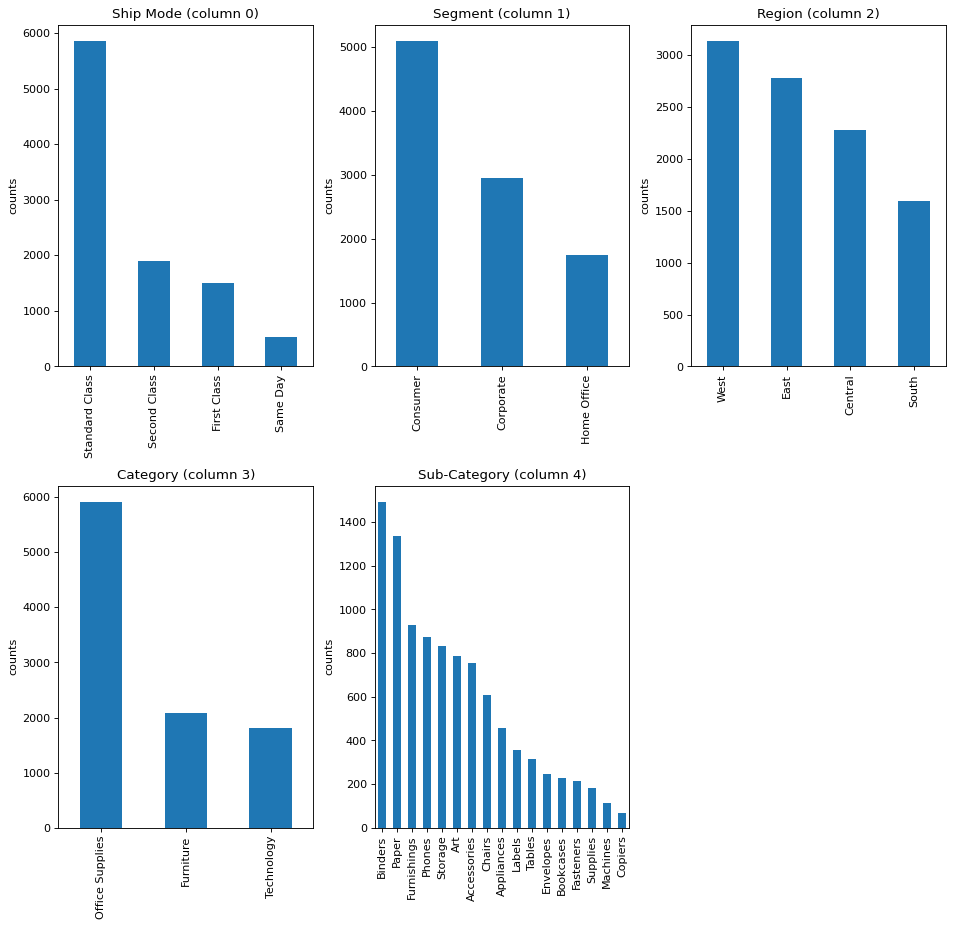

In [119]:
plotPerColumnDistribution(data, 10, 3)

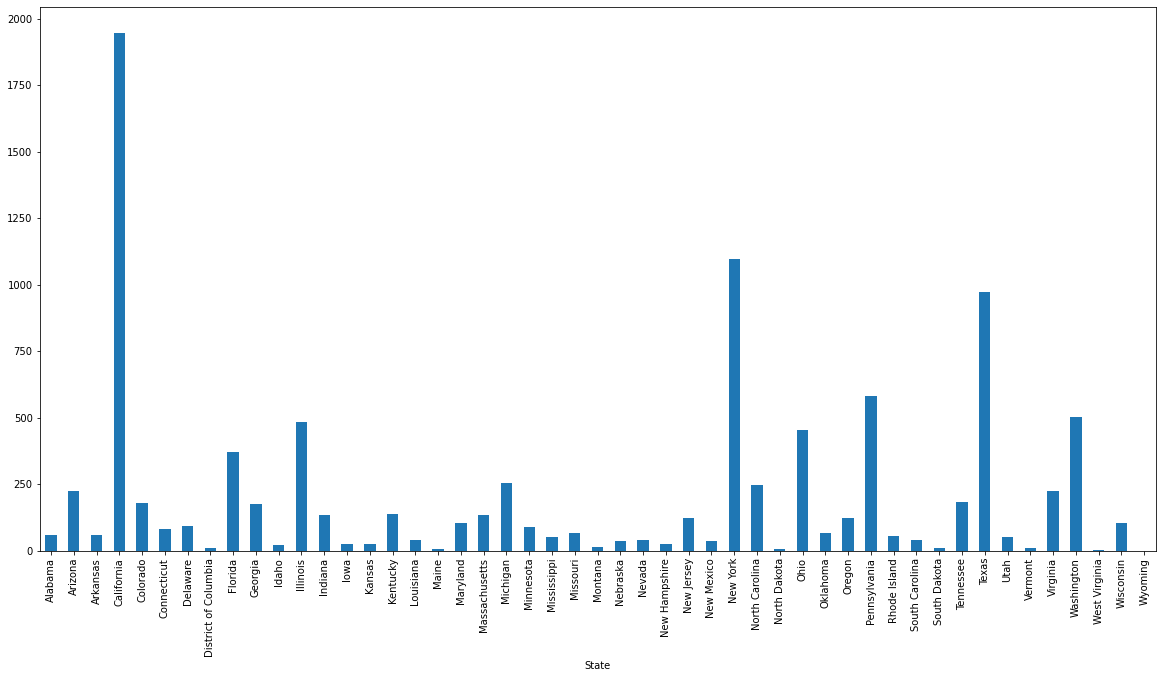

In [120]:
data.groupby(['State']).size().plot(kind='bar',figsize=(20,10))

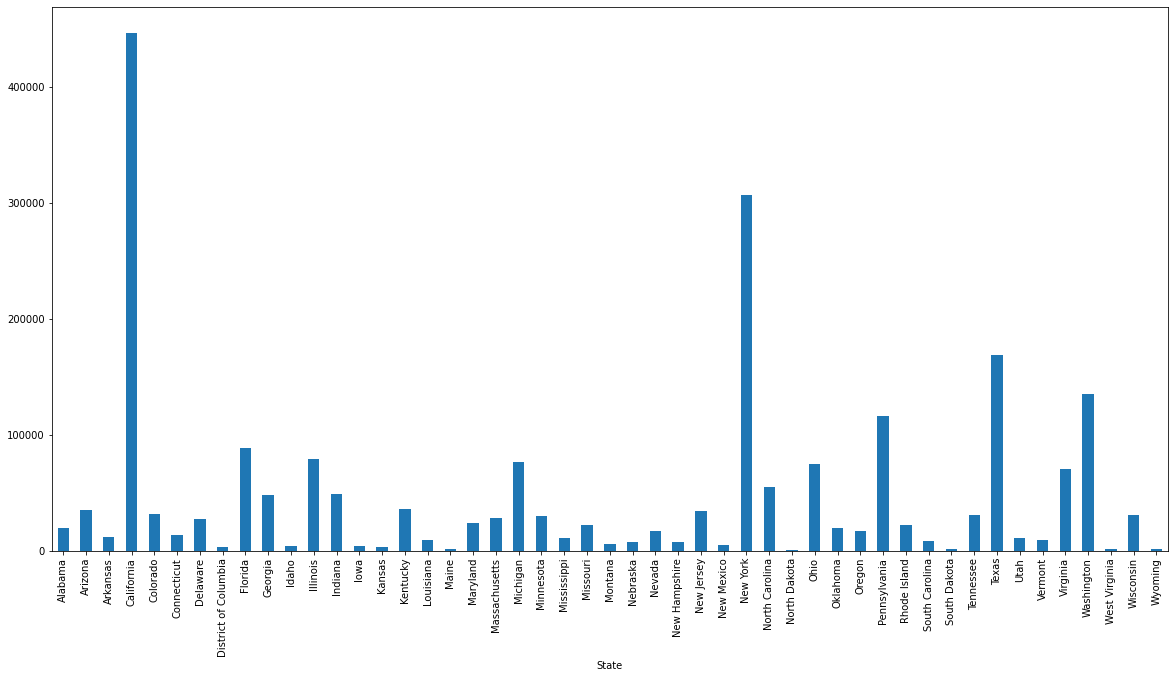

In [121]:
data.groupby(['State']).sum()['Sales'].plot(kind='bar', figsize=(20,10))

In [122]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')


In [123]:
# Function to get month from a date
def Function_get_month(inpDate):
    return(inpDate.month)

# Function to get Year from a date
def Function_get_year(inpDate):
    return(inpDate.year)


# Creating new columns
data['Month']=data['Order Date'].apply(Function_get_month)
data['Year']=data['Order Date'].apply(Function_get_year)

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,2017
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,2016


In [124]:
data['Year'].unique()

array([2017, 2016, 2015, 2018])

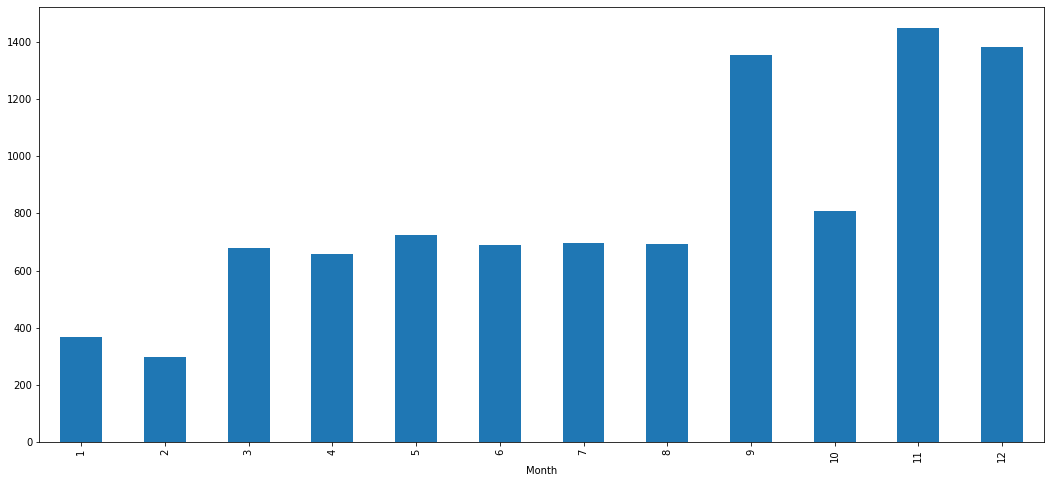

In [125]:
data.groupby(['Month']).size().plot(kind='bar',figsize=(18,8))

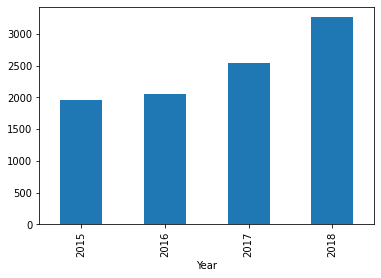

In [126]:
data.groupby(['Year']).size().plot(kind='bar')

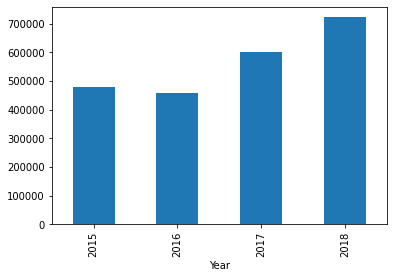

In [127]:
data.groupby(['Year']).sum()['Sales'].plot(kind='bar')

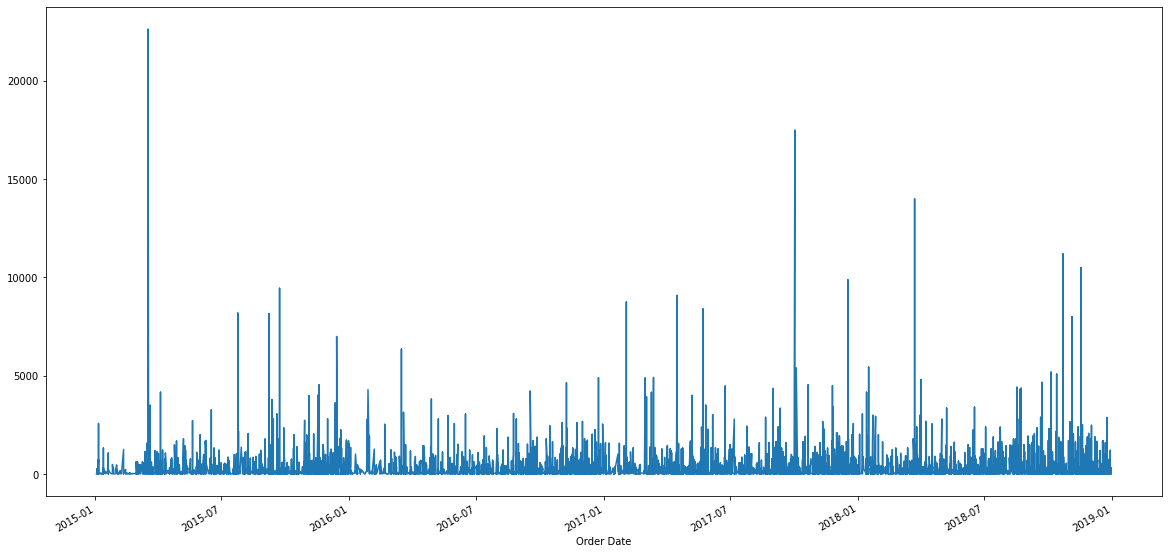

In [128]:
data.set_index("Order Date", inplace = True)
data['Sales'].plot(figsize=(20,10))

In [129]:
# Aggregating the sales quantity for each month for all categories
pd.crosstab(columns=data['Month'],
            index=data['Year'],
            values=data['Sales'],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2015,14205.7070,4519.8920,55205.7970,27906.8550,23644.3030,34322.9356,33781.543,27117.5365,81623.5268,31453.3930,77907.6607,68167.0585
2016,18066.9576,11951.4110,32339.3184,34154.4685,29959.5305,23599.3740,28608.259,36818.3422,63133.6060,31011.7375,75249.3995,74543.6012
2017,18542.4910,22978.8150,51165.0590,38679.7670,56656.9080,39724.4860,38320.783,30542.2003,69193.3909,59583.0330,79066.4958,95739.1210
2018,43476.4740,19920.9974,58863.4128,35541.9101,43825.9822,48190.7277,44825.104,62837.8480,86152.8880,77448.1312,117938.1550,83030.3888


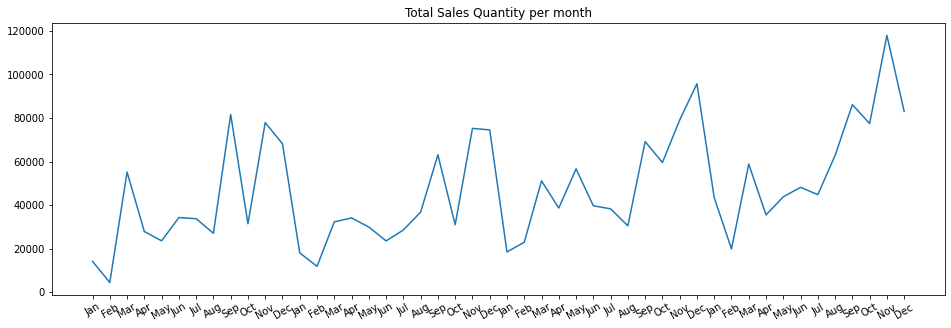

In [130]:
SalesQuantitiy=pd.crosstab(columns=data['Year'],
            index=data['Month'],
            values=data['Sales'],
            aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
%matplotlib inline
SalesQuantitiy.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

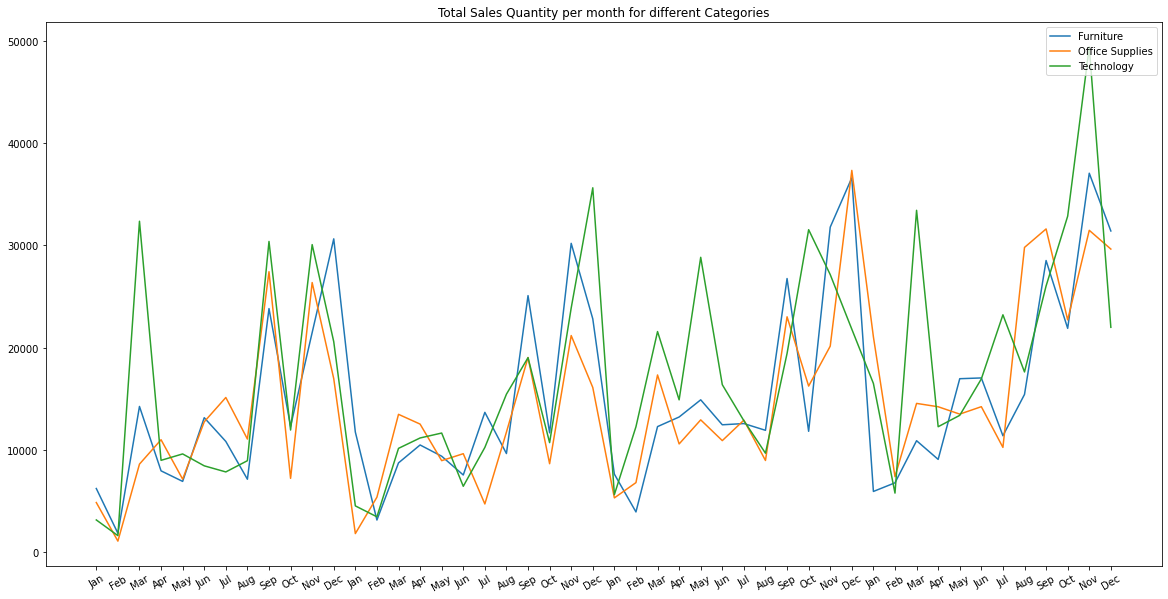

In [131]:
for st in (data['Category'].unique()):
    StandardClassSalesData = data[data['Category']== st]
    SalesQuantity=pd.crosstab(columns=StandardClassSalesData['Year'],
                index=StandardClassSalesData['Month'],
                values=StandardClassSalesData['Sales'],
                aggfunc='sum').melt()['value']

    MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

    # Plotting the sales
    SalesQuantity.plot(kind='line', label = st, figsize=(20,10), title='Total Sales Quantity per month for different Categories')
    # Setting the x-axis labels
    plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)
    plt.legend(loc="upper right")

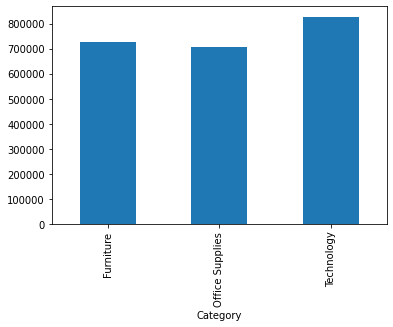

In [132]:
 data.groupby(['Category']).sum()['Sales'].plot(kind='bar')

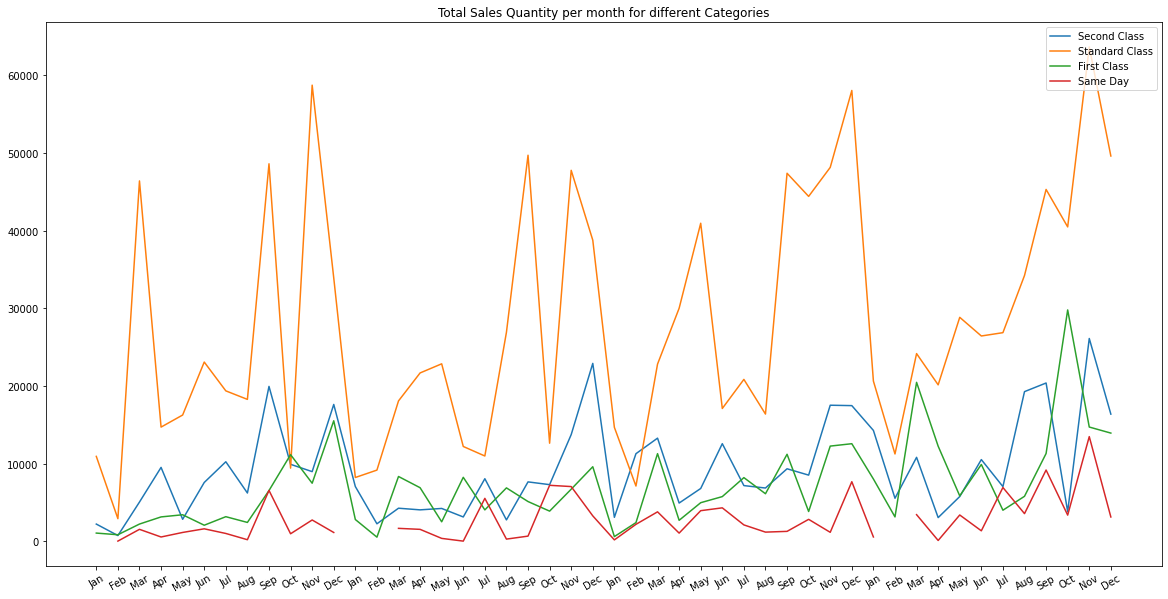

In [177]:
for st in (data['Ship Mode'].unique()):
    StandardClassSalesData = data[data['Ship Mode']== st]
    SalesQuantity=pd.crosstab(columns=StandardClassSalesData['Year'],
                index=StandardClassSalesData['Month'],
                values=StandardClassSalesData['Sales'],
                aggfunc='sum').melt()['value']

    MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

    # Plotting the sales
    SalesQuantity.plot(kind='line',label = st, figsize=(20,10), title='Total Sales Quantity per month for different Categories')
    # Setting the x-axis labels
    plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)
    plt.legend(loc="upper right")

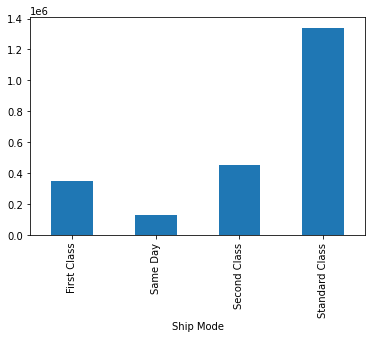

In [134]:
 data.groupby(['Ship Mode']).sum()['Sales'].plot(kind='bar')

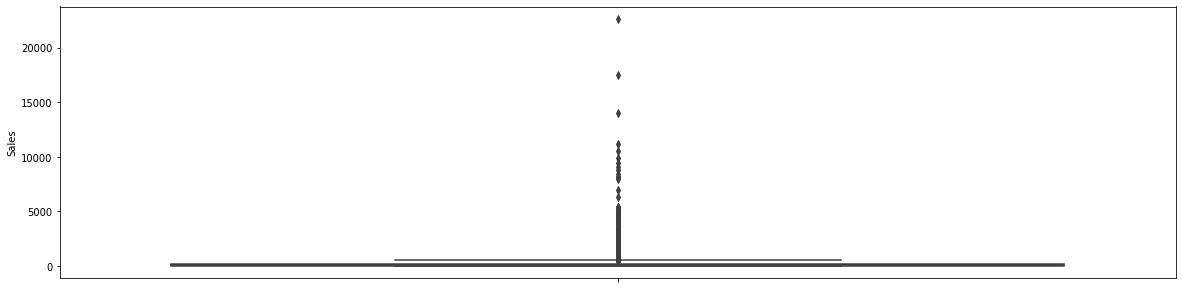

In [135]:
#plt.boxplot(data['Sales'], figsize=(20,10)) 
plt.figure(figsize=(20,5))
ax = sns.boxplot(y=data["Sales"])

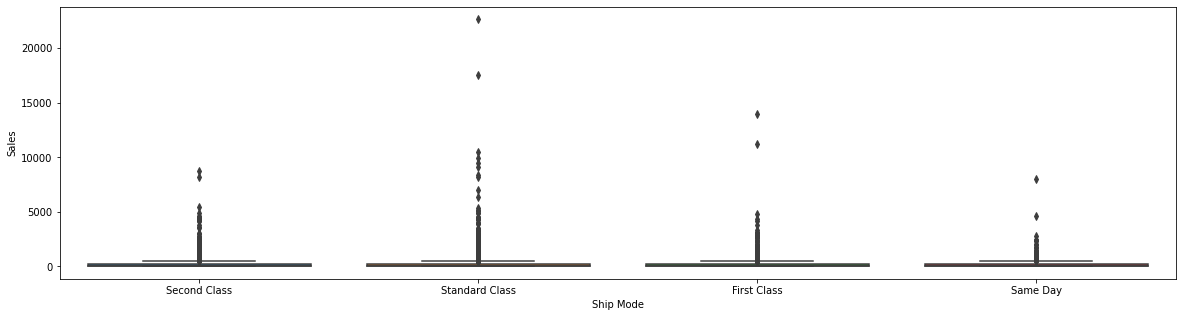

In [178]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(x=data["Ship Mode"], y=data["Sales"])

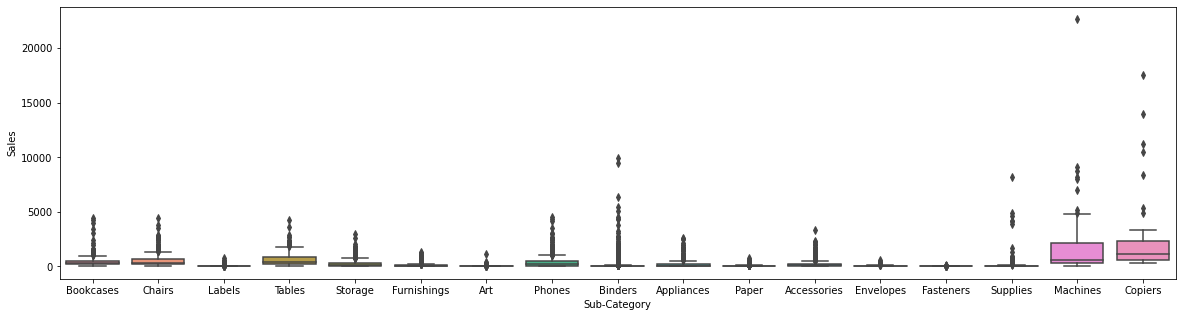

In [137]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(x=data["Sub-Category"], y=data["Sales"])

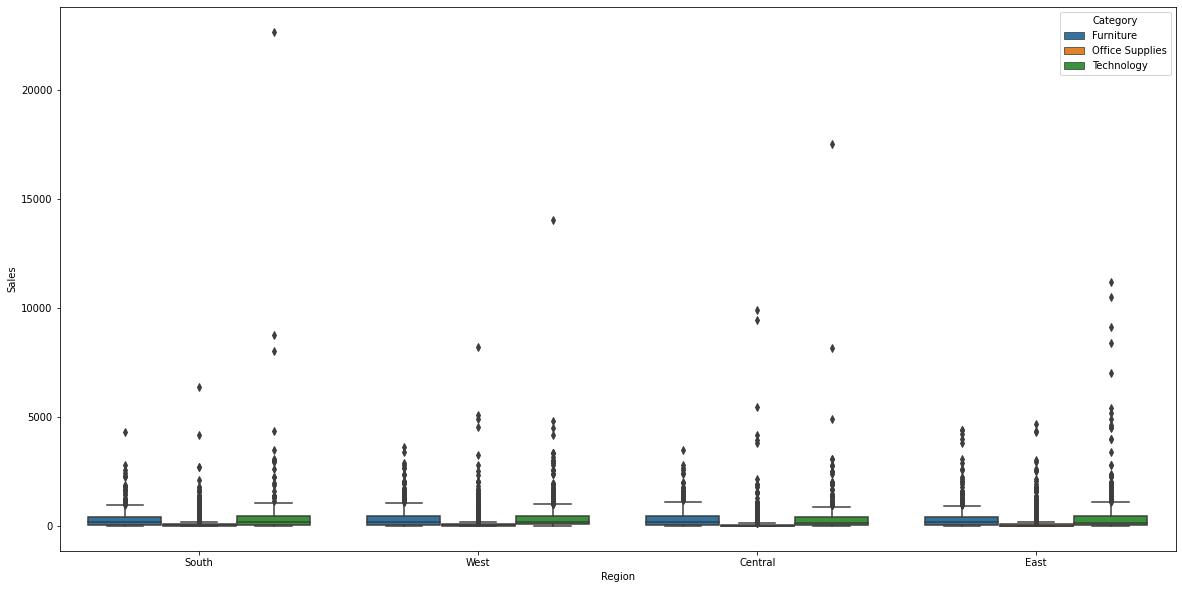

In [138]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x=data["Region"], y=data["Sales"] , hue = data["Category"])

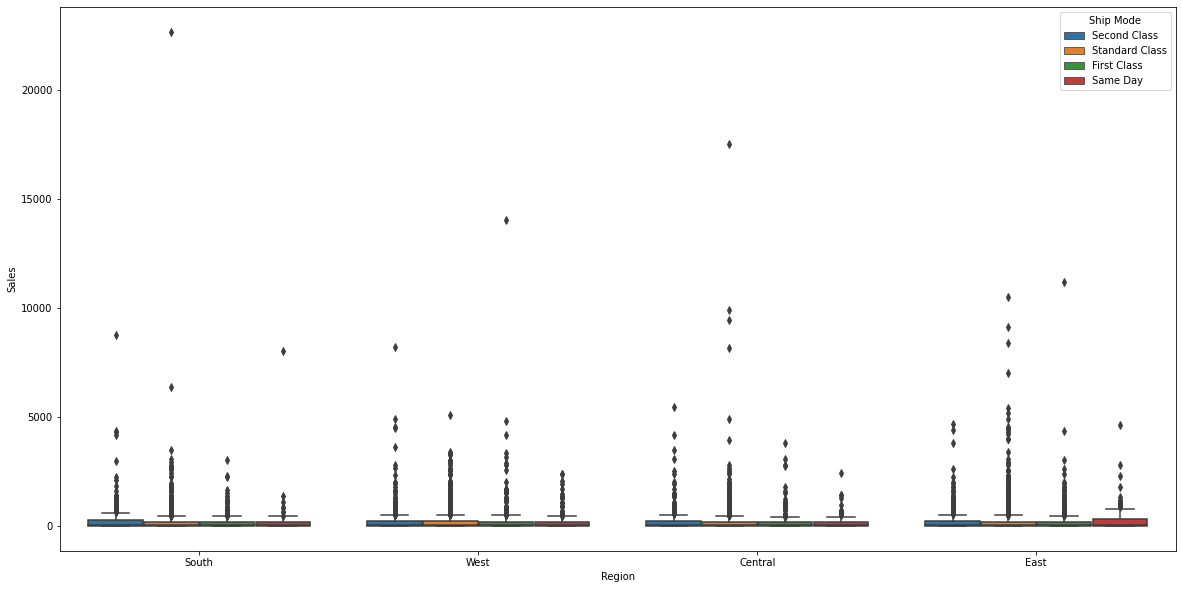

In [139]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x=data["Region"], y=data["Sales"] , hue = data["Ship Mode"])

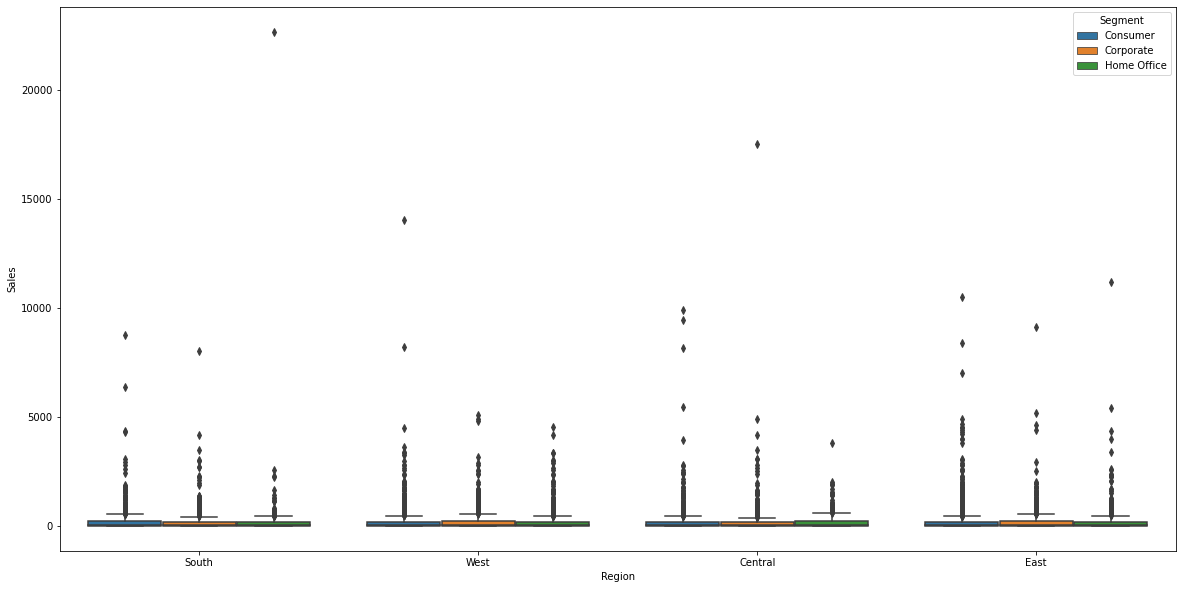

In [140]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x=data["Region"], y=data["Sales"] , hue = data["Segment"])

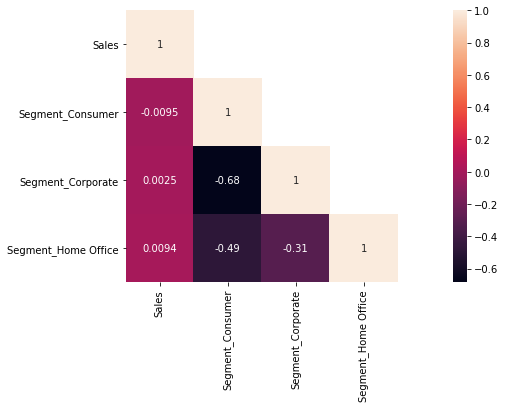

In [141]:
df1 = data[['Segment','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

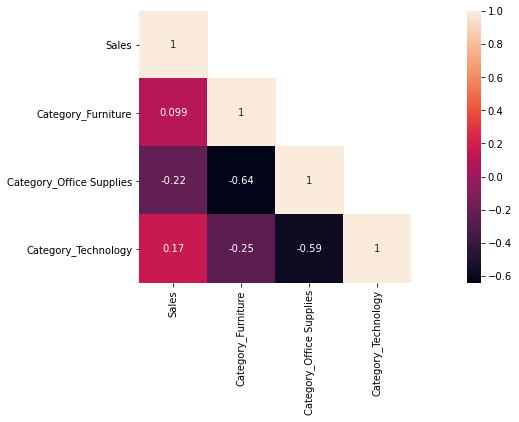

In [142]:
df1 = data[['Category','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

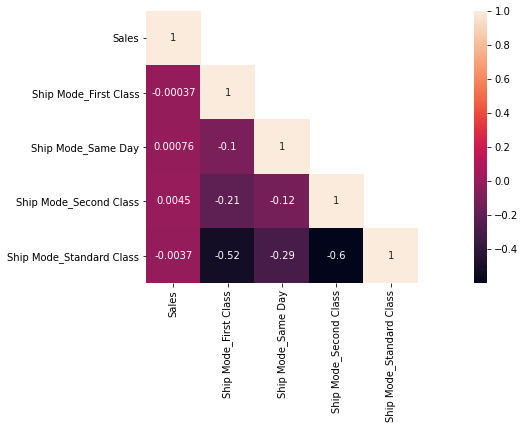

In [143]:
df1 = data[['Ship Mode','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

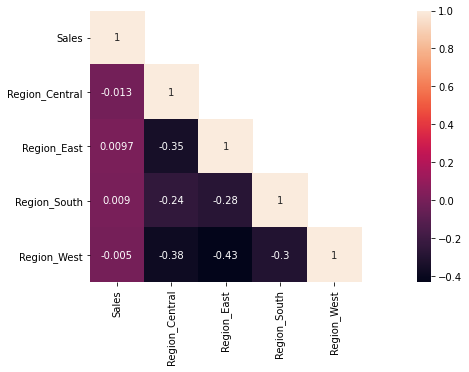

In [180]:
df1 = data[['Region','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

In [146]:
data.drop('Row ID',axis = 1, inplace = True) 
data.drop('Order ID',axis = 1, inplace = True)
data.drop('Ship Date',axis = 1, inplace = True)
data.drop('Customer ID',axis = 1, inplace = True) 
data.drop('Country',axis = 1, inplace = True) 
data.drop('Customer Name',axis = 1, inplace = True) 
data.drop('Product Name',axis = 1, inplace = True)
data.drop('Product ID',axis = 1, inplace = True)
data.drop('Postal Code',axis = 1, inplace = True)

In [147]:
data.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Month,Year
Order Date,,,,,,,,,,
2017-11-08,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,11,2017
2017-11-08,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,11,2017
2017-06-12,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,6,2017
2016-10-11,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,10,2016
2016-10-11,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,10,2016
2015-06-09,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,6,2015
2015-06-09,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,6,2015
2015-06-09,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,2015
2015-06-09,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,6,2015


               Sales
Order Date          
2017-11-08  261.9600
2017-11-08  731.9400
2017-06-12   14.6200
2016-10-11  957.5775
2016-10-11   22.3680
...              ...
2017-05-21    3.7980
2016-01-12   10.3680
2016-01-12  235.1880
2016-01-12   26.3760
2016-01-12   10.3840

[9800 rows x 1 columns]


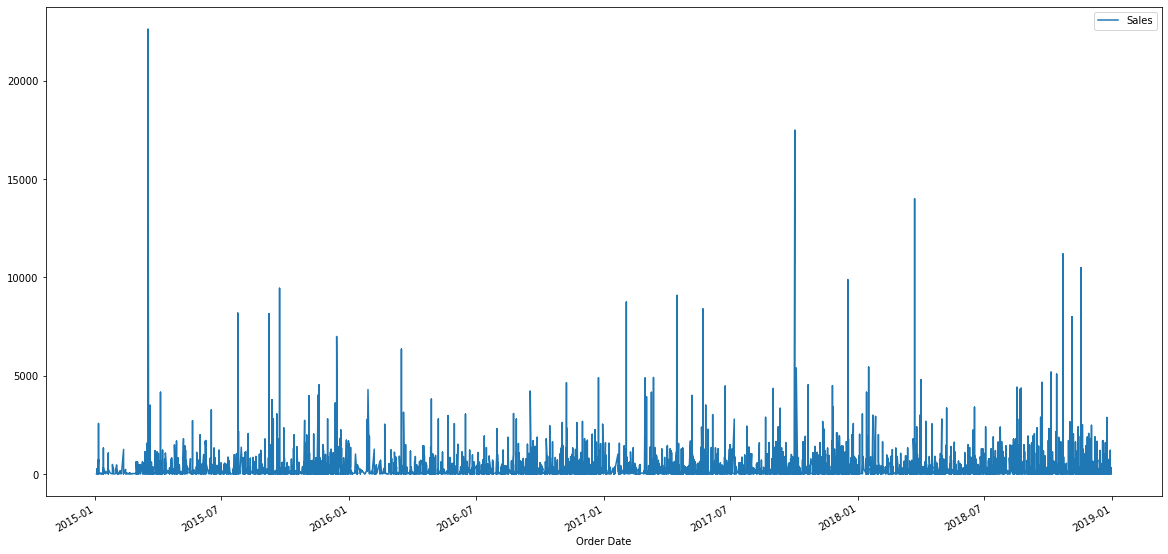

In [148]:
# # Checkting for Stationarity
new_data = pd.DataFrame(data['Sales'])
print(new_data)
new_data.plot(figsize=(20,10));
new_data = pd.DataFrame(new_data['Sales'].resample('D').mean())
new_data = new_data.interpolate(method='linear')

In [149]:
# Method 1
train, test, validate = np.split(new_data['Sales'].sample(frac=1), [int(.6*len(new_data['Sales'])),int(.8*len(new_data['Sales']))])

In [150]:
mean1, mean2, mean3 = train.mean(), test.mean(), validate.mean() #taking mean of train, test and validate data
var1, var2, var3 = train.var(), test.var(), validate.var() #taking variance of train, test and validate data

print('Mean:')
print(mean1, mean2, mean3)
print('Variance:')
print(var1, var2, var3)

Mean:
222.8526122309799 229.5709524064172 214.50804376936492
Variance:
67675.78032416047 120792.27742118038 36241.077195302714


In [151]:
# Method 2
# Augmented Dicky Fuller Test

from statsmodels.tsa.stattools import adfuller

adf = adfuller(new_data) 

print(adf)
print('\nADF = ', str(adf[0])) #more towards negative value the better
print('\np-value = ', str(adf[1]))
print('\nCritical Values: ')

for key, val in enumerate(adf[4]): #for loop to print the p-value (1%, 5% and 10%) and their respective values
    print(key,':',val)
    
    if adf[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary')

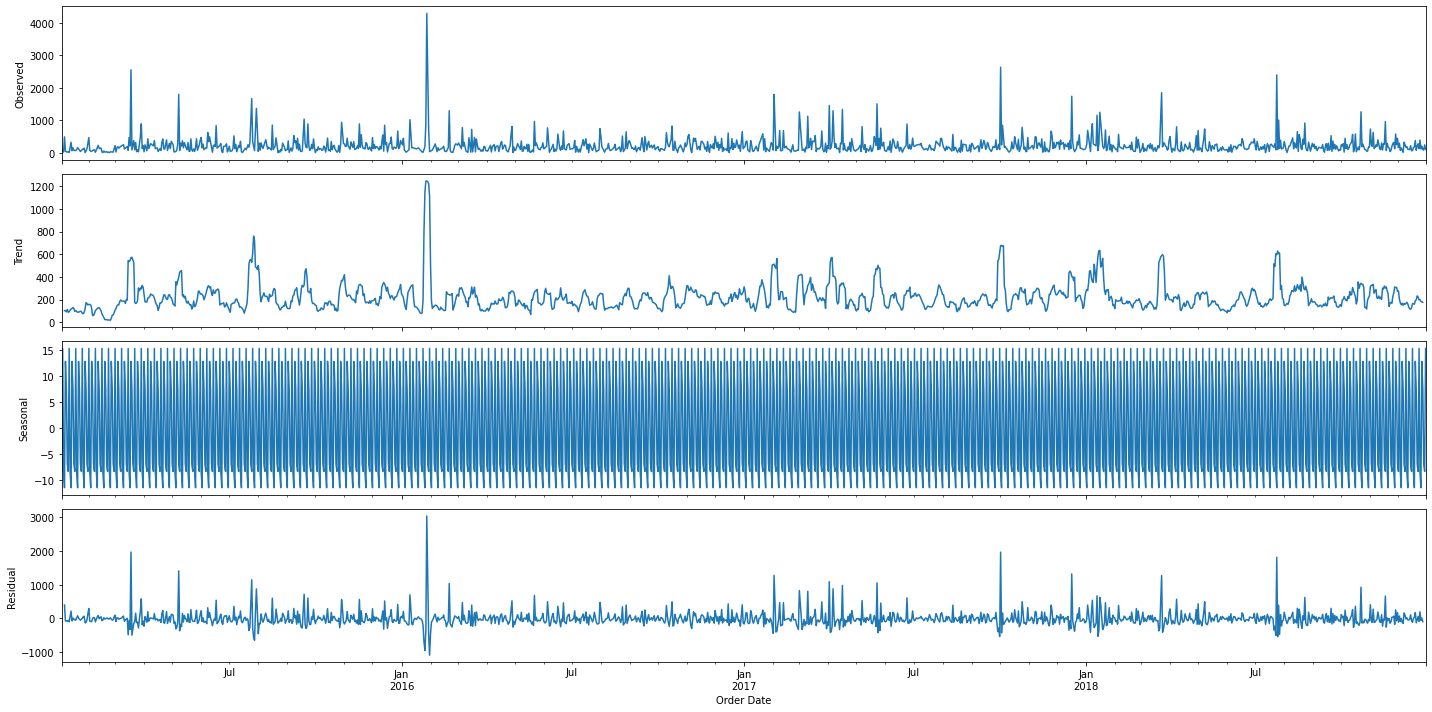

In [152]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(new_data, model='additive') #function used to decompose Time Series Data into Trend and Seasonality
fig = decomposition.plot()
plt.show();

In [153]:
import itertools
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))] #for loop for creating combinations of seasonal parameters of SARIMA
print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

Examples of parameter combinations for Seasonal ARIMA:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [154]:
for parameters in pdq: #for loop for determining the best combination of seasonal parameters for SARIMA
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(new_data,
                                            order=parameters,
                                            seasonal_param_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False) #determines the AIC value of the model
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, seasonal_param, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:20882.28406680822
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:20882.28406680822
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:20882.28406680822
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:20882.28406680822
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:20882.28406680822
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:20882.28406680822
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:20882.28406680822
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:20882.28406680822
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:21077.55722633678
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:21

In [169]:
mod = sm.tsa.statespace.SARIMAX(new_data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False) #model defintion
results = mod.fit() #model fitting
print(results.summary().tables[1]) # displaying the result 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2127      0.010     20.354      0.000       0.192       0.233
ma.L1         -1.0000      1.100     -0.909      0.363      -3.155       1.155
ar.S.L12      -0.0352      0.042     -0.839      0.401      -0.117       0.047
sigma2      6.893e+04    7.6e+04      0.907      0.365   -8.01e+04    2.18e+05


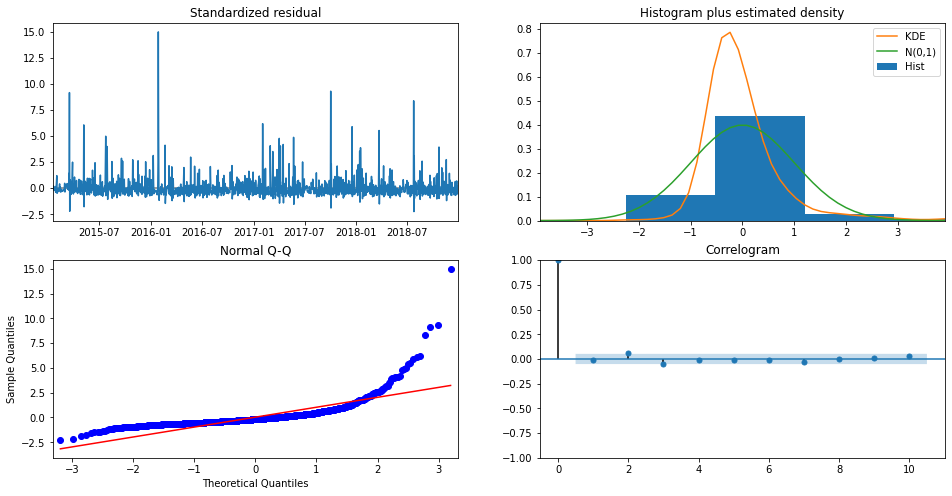

In [170]:
results.plot_diagnostics(figsize=(16, 8)) 
plt.show()

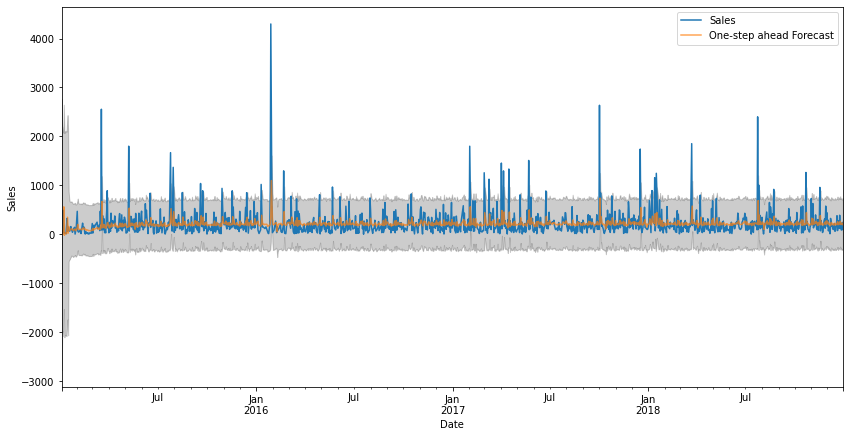

In [171]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-03'), dynamic=False) # variable to display plot for predicted values
pred_val = pred.conf_int()
ax = new_data['2014':].plot(label='observed') # displays plot for original values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7)) # displays plot for predicted values
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [176]:
y_forecasted = pred.predicted_mean
y_truth = new_data['Sales']

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_forecasted, y_truth)
rmse = sqrt(mse)
print('The Mean Squared Error of the forecasts is {}'.format(round(rmse, 2))) 

The Mean Squared Error of the forecasts is 262.58


In [173]:
forecast = results.forecast(steps=7) # making a forecast of 7 days later of the last date in the 'Order Date' column
print(forecast.astype('int'))

2018-12-31    191
2019-01-01    223
2019-01-02    223
2019-01-03    221
2019-01-04    226
2019-01-05    217
2019-01-06    227
Freq: D, dtype: int64


In [174]:
forecast = forecast.astype('int') 
forecast_df = forecast.to_frame()
forecast_df.reset_index(level=0, inplace=True) 
forecast_df.columns = ['Prediction Date', 'Predicted Sales'] 
prediction = pd.DataFrame(forecast_df).to_csv('prediction.csv',index=False) # saving the output as a csv file with name 'prediction.csv'